In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('data.xlsx',sheet_name = 'fx',index_col = 0)
surp_idx = pd.read_excel('data.xlsx',sheet_name = 'surprize_index',index_col = 0)
short_yld = pd.read_excel('data.xlsx',sheet_name = 'shortyield',index_col = 0)
long_yld = pd.read_excel('data.xlsx',sheet_name = 'longyield',index_col = 0)
inf_idx = pd.read_excel('data.xlsx',sheet_name = 'inflation',index_col = 0)

In [4]:
assets = ['USDCHF','USDJPY','USDEUR','USDGBP','USDNOK','USDAUD','USDNZD','USDCAD','USDZAR','USDBRL','USDMXN','USDTRY']
df.columns = assets
## Clean data such that USD is the denominator
for col in ['USDEUR', 'USDGBP', 'USDNZD', 'USDAUD']:
    df [col] =1/df[col]
df.columns,surp_idx.columns,short_yld.columns,long_yld.columns,inf_idx.columns = assets,assets,assets,assets,assets
start_dt = '2010-01-01'
df = df[start_dt:]
surp_idx = surp_idx[start_dt:]
short_yld = short_yld[start_dt:]
long_yld = long_yld[start_dt:]
inf_idx = inf_idx[start_dt:]

#yld = yld.reindex_like(df).fillna(method = 'ffill')
#surp_idx = surp_idx.reindex_like(df).fillna(method = 'ffill')
#short_yld = short_yld.reindex_like(df).fillna(method = 'ffill')
#long_yld = long_yld.reindex_like(df).fillna(method = 'ffill')
#inf_idx = inf_idx.reindex_like(df).fillna(method = 'ffill')

### Clean Yield Differentials


In [5]:
yld = short_yld-long_yld
yld = (yld - yld.mean())/yld.std()
yld_1m_chg = yld.diff(20).shift()
yld_1m_chg

,USDCHF,USDJPY,USDEUR,USDGBP,USDNOK,USDAUD,USDNZD,USDCAD,USDZAR,USDBRL,USDMXN,USDTRY
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,0.030956,-0.127912,-0.056874,0.081265,-0.097836,0.015042,0.129357,0.019356,-0.022077,-0.195285,-0.045807,0.137552
2024-06-04,-0.018253,-0.147885,0.018852,0.082738,-0.062511,0.088945,0.174872,0.061514,-0.046493,-0.237560,-0.150873,-0.146641
2024-06-05,0.002960,0.011220,-0.031977,0.096180,-0.073418,0.344660,0.162096,0.034601,-0.008116,-0.247409,-0.189009,0.495328


### Clean Inflation Data
Inflation Data is typically released 1 month late but in bbg they put it as as though it was released on time

In [6]:
inf_idx = (inf_idx-inf_idx.mean())/inf_idx.std()
inf_idx = inf_idx.shift()
inf_idx['USDNZD'] = [0]*inf_idx.shape[0]
inf_idx['USDCAD'] = [0]*inf_idx.shape[0]

### Clean Surprize Index

In [7]:
surp_idx = (surp_idx-surp_idx.mean())/surp_idx.std()
surp_idx = surp_idx.shift().fillna(0)
surp_idx

,USDCHF,USDJPY,USDEUR,USDGBP,USDNOK,USDAUD,USDNZD,USDCAD,USDZAR,USDBRL,USDMXN,USDTRY
Date,,,,,,,,,,,,
2010-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-05,0.000000,0.191650,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-06,0.000000,-0.013456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-07,0.000000,-0.348735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2010-01-08,0.000000,-0.227859,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,-0.246463,-0.471798,-1.238763,-0.008143,-1.290251,-0.879338,-0.731901,-0.516613,-0.516613,-0.516613,-0.516613,-0.516613
2024-06-03,-0.246463,-0.461406,-0.821906,-0.008143,-0.797582,-0.879338,-0.699351,-0.478447,-0.478447,-0.478447,-0.478447,-0.478447
2024-06-04,0.218589,-0.471798,-0.821906,-0.008143,-0.797582,-0.879338,-0.699351,-0.685635,-0.685635,-0.685635,-0.685635,-0.685635


### Standardize Data

In [8]:
# Reindex like FX data
surp_idx = surp_idx.reindex_like(df).fillna(method = 'ffill').fillna(0)
inf_idx= inf_idx.reindex_like(df).fillna(method = 'ffill').fillna(0)
yld_1m_chg = yld_1m_chg.reindex_like(df).fillna(method = 'ffill').fillna(0)




### Obtain forward 1-month returns of FX

In [9]:
## Get forward 1 month returns
df_chg = df.fillna(method = 'ffill').pct_change().fillna(0)
w = 20
df_1m_chg = df.fillna(method = 'ffill').pct_change(w).fillna(0)

### Reindex data like fx file

In [10]:
yld_1m_chg = yld_1m_chg.reindex_like(df).fillna(method = 'ffill')
surp_idx = surp_idx.reindex_like(df).fillna(method = 'ffill')
inf_idx = inf_idx.reindex_like(df).fillna(method = 'ffill')

## Perform Rolling OLS with forward 1 month returns 


In [11]:
from statsmodels.regression.rolling import RollingOLS
import statsmodels.api as sm 
def rollingOLScoef(y,x,wdw):
    x = sm. add_constant(x,prepend = False)
    model = RollingOLS(y,x,window = wdw, min_nobs = 2) .fit()
    model = model.params
    model.columns = ['coef_', 'const'] 
    return model. coef_
def rollingOLSconst (x,y, wdw):
    x = sm. add_constant(x, prepend - False)
    model = RollingOLS(y,x,window = wdw,min_nobs = 2).fit()
    model = model.params
    model.columns = ['coef_', 'const'] 
    return model.const

In [12]:
wdw = 20
ret_pred = pd.DataFrame()
for a in df.columns:
    x= pd.concat([surp_idx[[a]],yld_1m_chg[[a]],inf_idx[[a]]],axis=1)
    x= sm.add_constant(x,prepend = False)
    y = df_1m_chg[[a]]
    model = RollingOLS(y,x,window = wdw, min_nobs = 4).fit()
    model = model.params
    model.columns = ['surp_idx', 'yld_1m_chg', 'inf_idx', "const"]
    pred = model.surp_idx*surp_idx[a]+ model.yld_1m_chg *yld_1m_chg[a] + model.inf_idx*inf_idx[a]+model.const
    pred = pd.DataFrame(pred, columns = [a])
    ret_pred=pd.concat([ret_pred,pred],axis = 1)
ret_pred = ret_pred.fillna(method = 'ffill').fillna(0)

### Make portfolio dollar neutral

In [13]:
def subtract_series(df):
    return df -ret_pred.mean(axis = 1)
ret_pred_clean = ret_pred.apply(lambda x: subtract_series(x))
def constraint_abs_w(df):
    return df/abs(ret_pred).sum(axis = 1)
ret_pred_clean = ret_pred_clean.apply(lambda x: constraint_abs_w(x))

### Weight Vector

In [14]:
ret_pred_clean

,USDCHF,USDJPY,USDEUR,USDGBP,USDNOK,USDAUD,USDNZD,USDCAD,USDZAR,USDBRL,USDMXN,USDTRY
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03,-0.054832,0.109812,-0.092902,-0.127977,-0.146700,-0.050968,-0.015937,-0.015937,0.035699,0.234637,0.151728,-0.026621
2024-06-04,-0.073866,0.064015,-0.075830,-0.110376,-0.167400,-0.061123,-0.011406,-0.011406,0.049856,0.212454,0.195595,-0.010513
2024-06-05,-0.070132,0.040277,-0.064315,-0.105120,-0.159718,-0.092748,-0.007965,-0.007965,0.058493,0.195038,0.204754,0.009403


<Axes: xlabel='Date'>

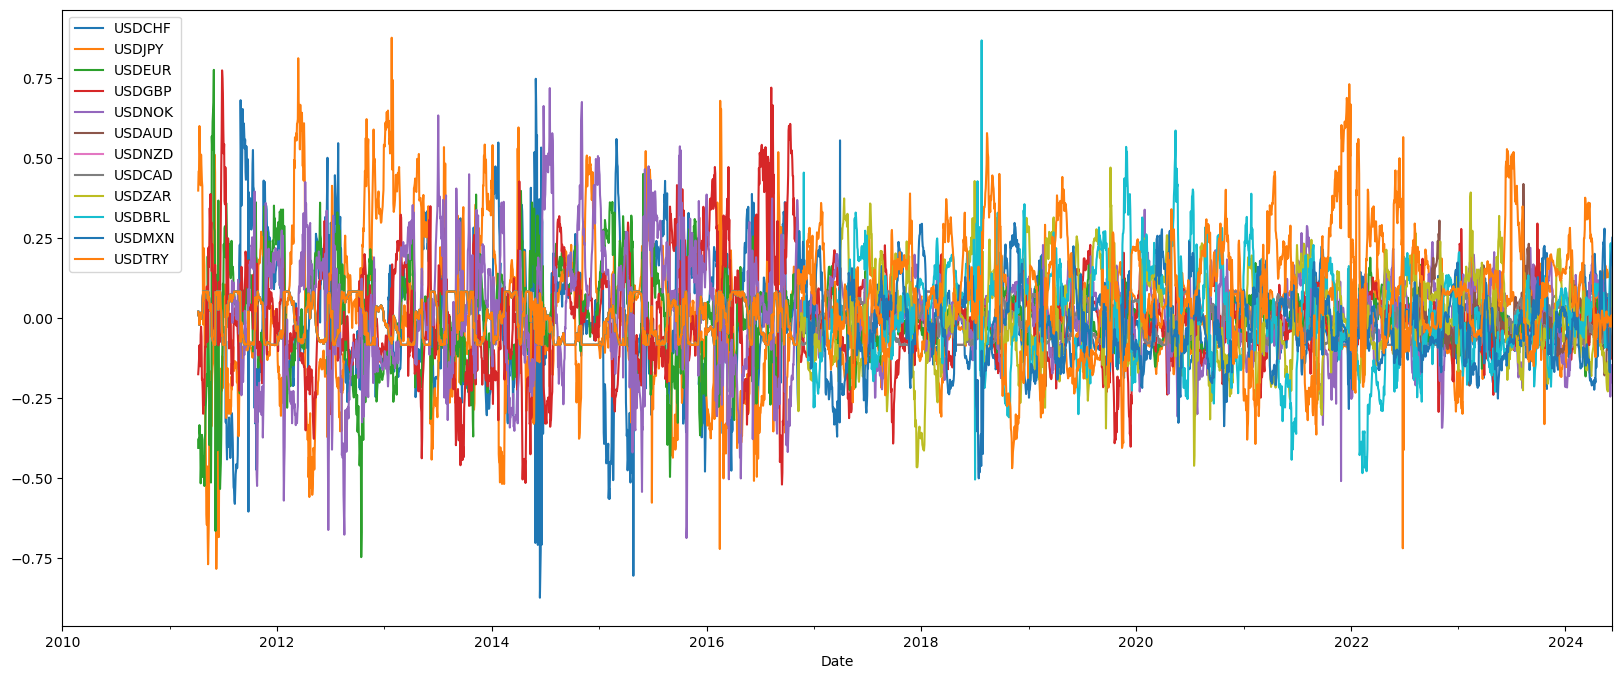

In [19]:
ret_pred_clean.plot(figsize = (20,8))

In [15]:
bt = ret_pred_clean*df_chg

In [16]:
x = bt.sum(axis=1)

<Axes: xlabel='Date'>

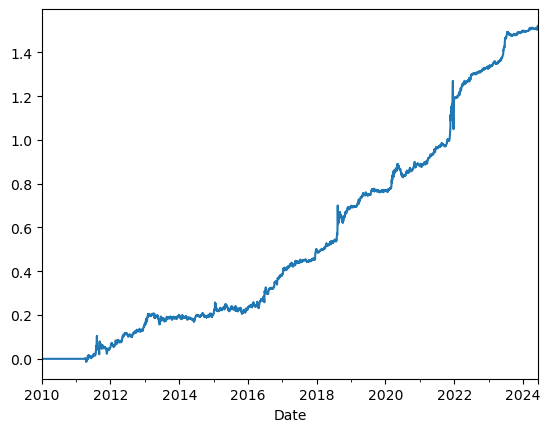

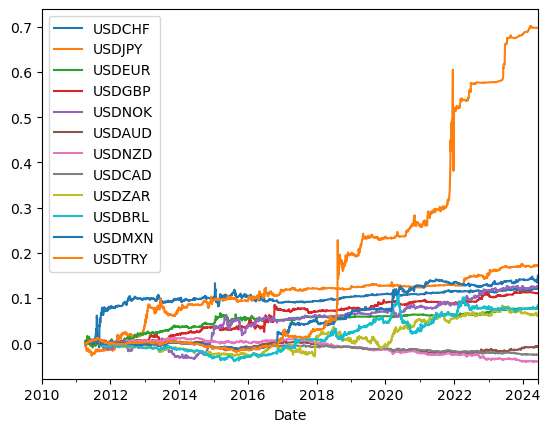

In [18]:
bt.sum(axis=1).cumsum().plot()
bt.cumsum().plot()